Reference:
Loy, James. "Neural Network Projects with Python". Packt

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Diabetes Dataset

In [0]:
df = pd.read_csv('/content/drive/My Drive/N/Diabetes/diabetes.csv')

In [0]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


### Variables
- **Pregnancies**: Number of previous pregnancies
- **Glucose**: Plasma glucose concentration
- **BloodPressure**: Diastolic blood pressure
- **SkinThickness**: Skin fold thickness measured from the triceps
- **Insulin**: Blood serum insulin concentration
- **BMI**: Body mass index
- **DiabetesPedigreeFunction**: A summarized score that indicates the genetic predisposition of the patient for diabetes, as extrapolated from the patient's family record for diabetes
- **Age**: Age in years
- **Outcome**: The target variable we are trying to predict, 1 for patients that developed diabetes within 5 years of the initial measurement, and 0 o.w.

### Data visualization

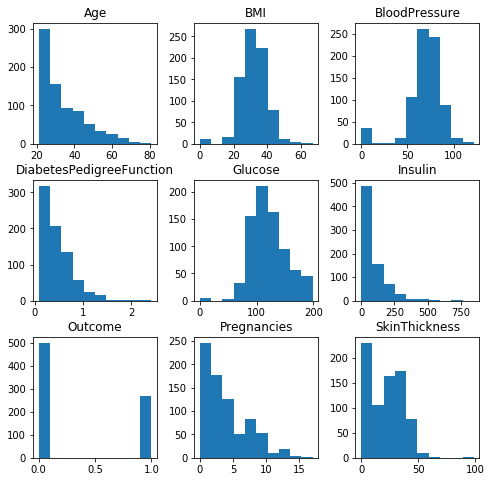

In [0]:
df.hist(figsize=(8,8), grid=False)
plt.show()

- Data was collected among young people btw 20 to 30 years old.
- BMI, BloodPressure, Glucose have normal distribution.
- Missing values: BMI, BloodPressure, Glucose have 0 values which is not logical, they must be missing values.
- Outliers: Many variables have outliers(i.e. Insulin, Pregnancies, skinThickness) and are reasonable.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


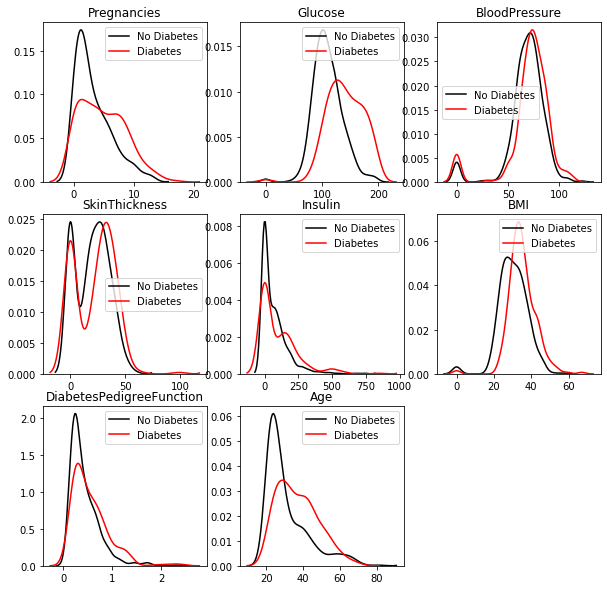

In [0]:
#import seaborn as sns
plt.subplots(3,3,figsize=(10,10))

# Create density plots for each variable
for idx, col in enumerate(df.columns):
  ax=plt.subplot(3,3,idx+1)
  #ax.yaxis.set_ticklabels([])
  sns.distplot(df.loc[df.Outcome==0][col], hist=False, axlabel=False, kde_kws={'linestyle':'-', 'color':'black','label':"No Diabetes"})
  sns.distplot(df.loc[df.Outcome==1][col], hist=False, axlabel=False, kde_kws={'linestyle':'-', 'color':'red','label':'Diabetes'})
  ax.set_title(col)

# Hide the 9th plot, since there are only 8 variables
plt.subplot(3,3,9).set_visible(False)

plt.show()

Some plots show a quite different distribution of non-diabetes and diabetes. For example, from the glutcose plot we can tell non-diabetes centered around 100 while diabetes have a higher mean glutcose. By having more previous pregnancies seem can lead to higher probability of having diabetes. Non-diabetes have smaller BMI values on average, and similarly from the Age plot we can tell that diabetes population is older.
Other plots do not show any significant difference among two groups.

## Data Preprocessing

In [0]:
# Checking missing values
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [0]:
data_description=df.describe(include="all")
data_description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As previously mentioned, there are some variables can never have observations equal to 0. From the table above, Glucose, BloodPressure, SkinThickness, Insulin, and BMI have some values equal to 0, which are missing values.

In [0]:
# Check number of 0-values for each variable
for col in df.columns:
  num_missing_values=df.loc[df[col]==0].shape[0]
  print(col+":"+str(num_missing_values))

Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0
Outcome:500


### Missing values
hading missing values:
- Remove whole rows with missing values.
- Replace missing values with mean, median, mode or other values.
- Predict the missing values by using other tools or models.


In [0]:
# import numpy as np
# Replace missing values with NaN
col=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for i in col:
  df[i]=df[i].replace(0, np.nan)

In [0]:
# Check number of 0-missing values for each column
for i in df.columns:
  num_missing_values = df.loc[df[i]==0].shape[0]
  print(i+":"+str(num_missing_values))

Pregnancies:111
Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [0]:
# Check NaN-missing values
print(df.isnull().any())

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [0]:
# Fill NaN col by col with its corresponding mean values
for i in col:
  df[i]=df[i].fillna(df[i].mean()) #df[i].maen(): Omit NaN and calculate the average.

### Data Standardization

Standardizing is neccessary since different scales of variables can affect the result a lot, the variable with a greater scale tends to dominate when training the network. 

In [0]:
#from sklearn import preprocessing
df_scaled = preprocessing.scale(df) # output is not pd DataFrame
#print(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns) # convert it back to pd DataFrame
#print(df_scaled.head())
df_scaled["Outcome"]=df["Outcome"] # Outcome column does not need to be scaled
df=df_scaled
print(df.head())

   Pregnancies   Glucose  ...       Age  Outcome
0     0.639947  0.865108  ...  1.425995        1
1    -0.844885 -1.206162  ... -0.190672        0
2     1.233880  2.015813  ... -0.105584        1
3    -0.844885 -1.074652  ... -1.041549        0
4    -1.141852  0.503458  ... -0.020496        1

[5 rows x 9 columns]


In [0]:
data_description=df.describe().loc[["mean","std","max"],].round(2).abs()
data_description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


Now all variables have 0 mean and unit variance.


### Split the Dataset
Including a training set, test set and a validation set.

In [0]:
# from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns!="Outcome"]
y = df.loc[:, "Outcome"]

In [0]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## Model Building

In [0]:
# from keras.models import Sequential
model = Sequential()

### First hidden layer
- inpue shape = (8,): 8 variables/features 
- 32 neurons in the 1st layer
- ReLU(rectified linear unit): $f(x)=max(0,x) $

In [0]:
# from keras.layers import Dense
model.add(Dense(32, activation='relu', input_shape=(8,))) 

### Second hidden layer

In [0]:
model.add(Dense(16, activation='relu'))

### Outpit layer
- sigmoid: $\frac{1}{1+e^{-x}}$ squashes the output btw 0 and 1.

In [0]:
model.add(Dense(1, activation='sigmoid'))

In [0]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
None


### Model complication
define parameters using **compile** method
- **Optimizer:** 
  - *Adam* optimizer works best for DNNs 
  - *sgd* optimizer works best for shallow NNs
  - *Adagrad* optimizer
- **Loss function:**
  - *mean_squared_error:* regression
  - *categorical_crossentropy:* multiclass classification
  - *binary_crossentropy:* binary classification
- **Metrices:** 
  - *accuracy:* percentage of correctly classified samples



In [0]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Model Training
model.fit()

In [0]:
model.fit(X_train, y_train, epochs=200)




Epoch 1/200





491/491 [==============================] - 1s 2ms/step - loss: 0.7370 - acc: 0.3870
Epoch 2/200
491/491 [==============================] - 0s 55us/step - loss: 0.6667 - acc: 0.6029
Epoch 3/200
491/491 [==============================] - 0s 59us/step - loss: 0.6134 - acc: 0.7312
Epoch 4/200
491/491 [==============================] - 0s 63us/step - loss: 0.5716 - acc: 0.7536
Epoch 5/200
491/491 [==============================] - 0s 82us/step - loss: 0.5402 - acc: 0.7719
Epoch 6/200
491/491 [==============================] - 0s 59us/step - loss: 0.5147 - acc: 0.7800
Epoch 7/200
491/491 [==============================] - 0s 64us/step - loss: 0.4962 - acc: 0.7780
Epoch 8/200
491/491 [==============================] - 0s 56us/step - loss: 0.4835 - acc: 0.7800
Epoch 9/200
491/491 [==============================] - 0s 62us/step - loss: 0.4741 - acc: 0.7821
Epoch 10/200
491/491 [==============================] - 0s 63us/step - loss: 0.4666 - acc: 0.7821
Epoch 11/200
491/491 [

## Results analysis
### Testing accuracy
evaluate()

In [0]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" %(scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" %(scores[1]*100))

491/491 [==============================] - 0s 122us/step
Training Accuracy: 93.28%

154/154 [==============================] - 0s 54us/step
Testing Accuracy: 77.27%



### Confusion Matrix

- **True Negative:** Actual class is negative, predict negative
- **False Positive:** Actual class is negative, predict positive
- **False Negative:** Actual class is positive, predict negative
- **True Positive:** Actual class is positive, predict positive


Text(33.0, 0.5, 'Actual')

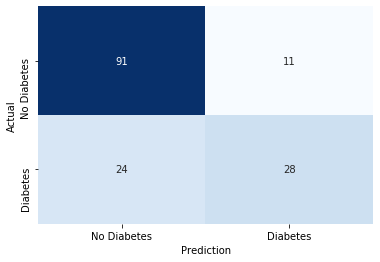

In [0]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
y_test_pred = model.predict_classes(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(conf_matrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'], cbar=False, cmap="Blues")
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

- **Accuracy:** $\frac{TP}{Total}$
- **Precision:** $\frac{TP}{TP+FP}$
- **Recall:** $\frac{TP}{TP+FN}$ (Sensitivity, TPR(True Positive rate))
- **FRP:** $\frac{FP}{FP+TN}$ (False Positive rate)
- **F-Measure:** $\frac{2*Precision*Recall}{Precision+Recall}$

We always prefer the model with lower FN.


### ROC curve
- **AUC:** Area under the curve. Larger AUC indicates higher accuracy.

In [0]:
#from sklearn.metrics import roc_curve
#import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive rate')

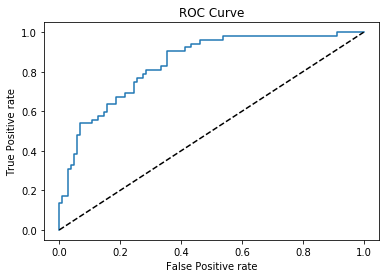

In [0]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') # 45 degree diagnol line
plt.title("ROC Curve")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

## Further Improvements
- feature selection
- replace missing values with other values
- how to improve FN